## **Import Required Libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report,f1_score,accuracy_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn import tree
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=FutureWarning)

## **Load the Datasets**

In [3]:
train_data=pd.read_csv("C:\\UOC pdf\\4th Year\\Machine Learning-02\\Data-Analysis-Project-2\\data\\train_data.csv")
test_data=pd.read_csv("C:\\UOC pdf\\4th Year\\Machine Learning-02\\Data-Analysis-Project-2\\data\\test_data.csv")

In [4]:
train_data=train_data.drop(columns=["Unnamed: 0"],axis=1)
test_data=test_data.drop(columns=["Unnamed: 0"],axis=1)

## **Split X_train,Y_train,X_test,Y_test**

In [5]:
X_train=train_data.drop(columns=["diagnosis"],axis=1)
Y_train=train_data["diagnosis"]
X_test=test_data.drop(columns=["diagnosis"],axis=1)
Y_test=test_data["diagnosis"]

In [6]:
print(f"Shape of the Training set:{X_train.shape,Y_train.shape}")
print(f"Shape of the Testing set:{X_test.shape,Y_test.shape}")

Shape of the Training set:((700, 15), (700,))
Shape of the Testing set:((300, 15), (300,))


## **Build the Pipeline**

In [7]:
num_cols=X_train.select_dtypes(include="number").columns  ##get the all numerical column names
cat_cols=X_train.select_dtypes(include=["object","category"]).columns ##get the all categorical column names

In [8]:
nominal_cols=["gender","pem_present","meditation_or_mindfulness"] ##nominal columns
ordinal_cols=["work_status","social_activity_level","exercise_frequency"] ##ordinal columns

#### **Define the Pipeline**

In [9]:
ordinal_pipeline=Pipeline(steps=[
    ("Ordinal Encoder",OrdinalEncoder())      ##Ordinal variable pipeline
])
nominal_pieline=Pipeline(steps=[
    ("Nominal Encoder",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))  ##Nominal variable pipeline
])

#### **Combine Pipeline**

In [10]:
Transfomers=ColumnTransformer(transformers=[
    ("Ordinal Pipeline",ordinal_pipeline,ordinal_cols), ##Combine the Ordinal Pipeline with Ordinal Columns
    ("Nominal Pipeline",nominal_pieline,nominal_cols)   ##Combine the Nominal Pipeline with Nominal Columns
],
   n_jobs=-1,
   verbose=True,
   remainder="drop"
)

#### **End Pipeline**

In [11]:
final_pipeline=Pipeline(steps=[
    ("Preprocessing",Transfomers),  ##Preprocessing Step
    ("Resampling SMOTE",SMOTE(random_state=42)),  ##SMOTE Resampling Method
    ("Decision Tree Classifier",DecisionTreeClassifier(random_state=42)) ##Apply SVC
])

#### **Execute Pipeline**

In [12]:
final_pipeline.fit(X_train,Y_train)  ## Execute the Final Pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('Ordinal Pipeline',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoder',
                                                                   OrdinalEncoder())]),
                                                  ['work_status',
                                                   'social_activity_level',
                                                   'exercise_frequency']),
                                                 ('Nominal Pipeline',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'pem_present',
                                                   'meditation_or_mindfulness'])],
                                   verbose=True)),
                ('Resampling SMOTE', SMOTE(random_state=42)),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(random_state=42))])

## **Model Evaluation**

In [13]:
Y_pred=final_pipeline.predict(X_test) ##get the prediction values

In [14]:
report_dt=classification_report(Y_test,Y_pred) ##get the classification report for predictions

In [15]:
Y_pred_train=final_pipeline.predict(X_train) ##get the preidction value for training set

In [16]:
report_dt_train=classification_report(Y_train,Y_pred_train) ##get the classification report for training 

#### **Get the Evaluation Metrics for Testing Data**

In [17]:
f1_test=f1_score(Y_test,Y_pred,average='weighted') ##F1 score for testing data
precision_test=precision_score(Y_test,Y_pred,average="weighted") ##precision for testing data
accuracy_test=accuracy_score(Y_test,Y_pred) ## accuracy score for testing data
recall_test=recall_score(Y_test,Y_pred,average="weighted") ## recall score for testing data

In [18]:
# Print results
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")
print(f"Recall Score: {recall_test:.4f}")

Accuracy:  0.7767
Precision: 0.7778
F1 Score:  0.7772
Recall Score: 0.7767


#### **Get the Evaluation Metrics for Training Data**

In [19]:
f1_train=f1_score(Y_train,Y_pred_train,average="weighted") ##F1 score for training data
precision_train=precision_score(Y_train,Y_pred_train,average="weighted") ## precision score for training data
accuracy_train=accuracy_score(Y_train,Y_pred_train) ## accuracy score for training data
recall_train=recall_score(Y_train,Y_pred_train,average="weighted") ##recall score for training data

In [20]:
# Print results
print(f"Accuracy:  {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1 Score:  {f1_train:.4f}")
print(f"Recall Score:{recall_train:.4f}")

Accuracy:  0.8971
Precision: 0.8983
F1 Score:  0.8976
Recall Score:0.8971


In [21]:
### print the classification report for testing data
print(report_dt)

              precision    recall  f1-score   support

        Both       0.38      0.39      0.39        54
  Depression       1.00      1.00      1.00       125
      ME/CFS       0.72      0.72      0.72       121

    accuracy                           0.78       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.78      0.78      0.78       300



In [22]:
## print the classification report for training data
print(report_dt_train)

              precision    recall  f1-score   support

        Both       0.75      0.78      0.76       148
  Depression       1.00      1.00      1.00       276
      ME/CFS       0.88      0.86      0.87       276

    accuracy                           0.90       700
   macro avg       0.87      0.88      0.88       700
weighted avg       0.90      0.90      0.90       700



## **Hyperparameter Tune using GridSearchCV**

In [23]:
param_grid = {
    'Decision Tree Classifier__criterion': ['gini', 'entropy', 'log_loss'],  
    'Decision Tree Classifier__splitter': ['best', 'random'],
    'Decision Tree Classifier__max_depth': [None, 5, 10, 20],
    'Decision Tree Classifier__min_samples_split': [2, 5, 10],
    'Decision Tree Classifier__min_samples_leaf': [1, 2, 4, 6],
    'Decision Tree Classifier__max_features': [None, 'sqrt', 'log2']
}

In [24]:
grid_search=GridSearchCV(final_pipeline,param_grid=param_grid,cv=5,scoring="f1_weighted")

#### **Execute the Pipeline**

In [27]:
grid_search.fit(X_train,Y_train) ##Execute the whole pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('Ordinal '
                                                                         'Pipeline',
                                                                         Pipeline(steps=[('Ordinal '
                                                                                          'Encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['work_status',
                                                                          'social_activity_level',
                                                                          'exercise_frequency']),
                                                                        ('Nominal '
                                                                         'Pipeline',
                                                                         Pipeline(steps=[('Nominal '
                                                                                          'Encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output...
             param_grid={'Decision Tree Classifier__criterion': ['gini',
                                                                 'entropy',
                                                                 'log_loss'],
                         'Decision Tree Classifier__max_depth': [None, 5, 10,
                                                                 20],
                         'Decision Tree Classifier__max_features': [None,
                                                                    'sqrt',
                                                                    'log2'],
                         'Decision Tree Classifier__min_samples_leaf': [1, 2, 4,
                                                                        6],
                         'Decision Tree Classifier__min_samples_split': [2, 5,
                                                                         10],
                         'Decision Tree Classifier__splitter': ['best',
                                                                'random']},
             scoring='f1_weighted')

#### **Best Model**

In [28]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'Decision Tree Classifier__criterion': 'entropy', 'Decision Tree Classifier__max_depth': None, 'Decision Tree Classifier__max_features': 'sqrt', 'Decision Tree Classifier__min_samples_leaf': 1, 'Decision Tree Classifier__min_samples_split': 2, 'Decision Tree Classifier__splitter': 'random'}


In [29]:
best_model=grid_search.best_estimator_

In [30]:
best_model

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('Ordinal Pipeline',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoder',
                                                                   OrdinalEncoder())]),
                                                  ['work_status',
                                                   'social_activity_level',
                                                   'exercise_frequency']),
                                                 ('Nominal Pipeline',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'pem_present',
                                                   'meditation_or_mindfulness'])],
                                   verbose=True)),
                ('Resampling SMOTE', SMOTE(random_state=42)),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='entropy',
                                        max_features='sqrt', random_state=42,
                                        splitter='random'))])

## **Model Evaluation**

In [31]:
Y_pred_cv=best_model.predict(X_test) ##get the prediction values

In [32]:
report_dt_cv=classification_report(Y_test,Y_pred_cv) ##get the classification report for predictions

In [33]:
Y_pred_train_cv=best_model.predict(X_train) ##get the preidction value for training set

In [34]:
report_dt_train_cv=classification_report(Y_train,Y_pred_train_cv) ##get the classification report for training 

#### **Get the Evaluation Metrics for Testing Data**

In [35]:
f1_test=f1_score(Y_test,Y_pred_cv,average='weighted') ##F1 score for testing data
precision_test=precision_score(Y_test,Y_pred_cv,average="weighted") ##precision for testing data
accuracy_test=accuracy_score(Y_test,Y_pred_cv) ## accuracy score for testing data
recall_test=recall_score(Y_test,Y_pred_cv,average="weighted") ## recall score for testing data

In [36]:
# Print results
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")
print(f"Recall Score: {recall_test:.4f}")

Accuracy:  0.7867
Precision: 0.7867
F1 Score:  0.7867
Recall Score: 0.7867


#### **Get the Evaluation Metrics for Training Data**

In [37]:
f1_train=f1_score(Y_train,Y_pred_train_cv,average="weighted") ##F1 score for training data
precision_train=precision_score(Y_train,Y_pred_train_cv,average="weighted") ## precision score for training data
accuracy_train=accuracy_score(Y_train,Y_pred_train_cv) ## accuracy score for training data
recall_train=recall_score(Y_train,Y_pred_train_cv,average="weighted") ##recall score for training data

In [38]:
# Print results
print(f"Accuracy:  {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1 Score:  {f1_train:.4f}")
print(f"Recall Score:{recall_train:.4f}")

Accuracy:  0.8971
Precision: 0.8983
F1 Score:  0.8976
Recall Score:0.8971


In [39]:
##classification report for testing data
print(report_dt_cv)

              precision    recall  f1-score   support

        Both       0.41      0.41      0.41        54
  Depression       1.00      1.00      1.00       125
      ME/CFS       0.74      0.74      0.74       121

    accuracy                           0.79       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.79      0.79      0.79       300



In [40]:
#### print the classification report for training data
print(report_dt_train_cv)

              precision    recall  f1-score   support

        Both       0.75      0.78      0.76       148
  Depression       1.00      1.00      1.00       276
      ME/CFS       0.88      0.86      0.87       276

    accuracy                           0.90       700
   macro avg       0.87      0.88      0.88       700
weighted avg       0.90      0.90      0.90       700



## **Hyperparameter Tune using Optuna**

In [41]:
import optuna
from sklearn.model_selection import cross_val_score

In [42]:
def objective(trials):
    ##define parameters 
    params = {
        'criterion': trials.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'splitter': trials.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trials.suggest_int('max_depth', 1, 50),
        'min_samples_split': trials.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trials.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trials.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'max_leaf_nodes': trials.suggest_int('max_leaf_nodes', 2, 100),
        'min_weight_fraction_leaf': trials.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
        'class_weight': trials.suggest_categorical('class_weight', ['balanced', None]),
     
    }
    ##Build the pipeline
    pipeline_optuna=Pipeline(steps=[
        ("Preprocessing",Transfomers),
        ("Resampling SMOTE",SMOTE(random_state=42)),
        ("Decision Tree Classifier",DecisionTreeClassifier(**params,random_state=42))
    ])

    ##cross validation score
    score=cross_val_score(pipeline_optuna,X_train,Y_train,cv=5,scoring="f1_weighted")
    return score.mean()

#### **Run the Optimizer**

In [43]:
study=optuna.create_study(
    study_name="dt_model"
    ,direction="maximize")
study.optimize(objective,n_trials=50) 

[I 2025-07-25 19:56:06,829] A new study created in memory with name: dt_model
[I 2025-07-25 19:56:07,071] Trial 0 finished with value: 0.6503436346949424 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 75, 'min_weight_fraction_leaf': 0.0751318673544561, 'class_weight': None}. Best is trial 0 with value: 0.6503436346949424.
[I 2025-07-25 19:56:07,302] Trial 1 finished with value: 0.2444565374456924 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 17, 'max_features': None, 'max_leaf_nodes': 66, 'min_weight_fraction_leaf': 0.3893985475297226, 'class_weight': None}. Best is trial 0 with value: 0.6503436346949424.
[I 2025-07-25 19:56:07,536] Trial 2 finished with value: 0.640726823454913 and parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 13, 'min_s

#### **Best Model**

In [44]:
best_model_optuna=study.best_params
print(f"Best Params:{best_model_optuna}")

Best Params:{'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 42, 'min_samples_split': 20, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'min_weight_fraction_leaf': 0.2829691005595136, 'class_weight': None}


#### **Rebuild the Pipeline with Best Parameters**

In [45]:
best_pipeline=Pipeline(steps=[
        ("Preprocessing",Transfomers),
        ("Resampling SMOTE",SMOTE(random_state=42)),
        ("Decision Tree Classifier",DecisionTreeClassifier(random_state=42,**best_model_optuna))
    ])

#### **Train the Model with Best Parameters**

In [46]:
best_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('Ordinal Pipeline',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoder',
                                                                   OrdinalEncoder())]),
                                                  ['work_status',
                                                   'social_activity_level',
                                                   'exercise_frequency']),
                                                 ('Nominal Pipeline',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'pem_present',
                                                   'meditation_or_mindfulness'])],
                                   verbose=True)),
                ('Resampling SMOTE', SMOTE(random_state=42)),
                ('Decision Tree Classifier',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=42,
                                        max_features='sqrt', max_leaf_nodes=4,
                                        min_samples_leaf=18,
                                        min_samples_split=20,
                                        min_weight_fraction_leaf=0.2829691005595136,
                                        random_state=42))])

#### **Evaluate the Model**

In [47]:
Y_pred_optuna=best_pipeline.predict(X_test) ##get the prediction values

In [48]:
report_rf_optuna=classification_report(Y_test,Y_pred_optuna) ##get the classification report for predictions

In [49]:
Y_pred_train_optuna=best_pipeline.predict(X_train) ##get the preidction value for training set

In [50]:
report_rf_train_optuna=classification_report(Y_train,Y_pred_train_optuna) ##get the classification report for training

#### **Get the Evaluation Metrics for Testing Data**

In [51]:
f1_test=f1_score(Y_test,Y_pred_optuna,average='weighted') ##F1 score for testing data
precision_test=precision_score(Y_test,Y_pred_optuna,average="weighted") ##precision for testing data
accuracy_test=accuracy_score(Y_test,Y_pred_optuna) ## accuracy score for testing data
recall_test=recall_score(Y_test,Y_pred_optuna,average="weighted") ## recall score for testing data

In [52]:
# Print results
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")
print(f"Recall Score:{recall_test:.4f}")

Accuracy:  0.7367
Precision: 0.7681
F1 Score:  0.7462
Recall Score:0.7367


#### **Get the Evaluation Metrics for Training Data**

In [53]:
f1_train=f1_score(Y_train,Y_pred_train_optuna,average="weighted") ##F1 score for training data
precision_train=precision_score(Y_train,Y_pred_train_optuna,average="weighted") ## precision score for training data
accuracy_train=accuracy_score(Y_train,Y_pred_train_optuna) ## accuracy score for training data
recall_train=recall_score(Y_train,Y_pred_train_optuna,average="weighted") ##recall score for training data

In [54]:
# Print results
print(f"Accuracy:  {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"F1 Score:  {f1_train:.4f}")
print(f"Recall Score:{recall_train:.4f}")

Accuracy:  0.7129
Precision: 0.7428
F1 Score:  0.7195
Recall Score:0.7129


## **Tree Diagram**

In [55]:
### Extract the decision tree from the pipeline
dt_cls=best_model.named_steps["Decision Tree Classifier"]

[Text(0.5122630477597243, 0.9736842105263158, 'x[5] <= 0.75\nentropy = 1.585\nsamples = 828\nvalue = [276, 276, 276]'),
 Text(0.508324101427868, 0.9210526315789473, 'x[4] <= 0.16\nentropy = 1.0\nsamples = 552\nvalue = [276, 0, 276]'),
 Text(0.5102935745937962, 0.9473684210526316, 'True  '),
 Text(0.2037173806006893, 0.868421052631579, 'x[1] <= 1.25\nentropy = 1.0\nsamples = 262\nvalue = [128, 0, 134]'),
 Text(0.10216642048252092, 0.8157894736842105, 'x[7] <= 0.627\nentropy = 0.976\nsamples = 98\nvalue = [40, 0, 58]'),
 Text(0.04283604135893648, 0.7631578947368421, 'x[4] <= 0.089\nentropy = 0.992\nsamples = 56\nvalue = [25, 0, 31]'),
 Text(0.038897095027080254, 0.7105263157894737, 'x[2] <= 0.966\nentropy = 0.988\nsamples = 55\nvalue = [24.0, 0.0, 31.0]'),
 Text(0.007877892663712457, 0.6578947368421053, 'x[0] <= 0.308\nentropy = 0.684\nsamples = 11\nvalue = [2, 0, 9]'),
 Text(0.003938946331856229, 0.6052631578947368, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.0118168389955

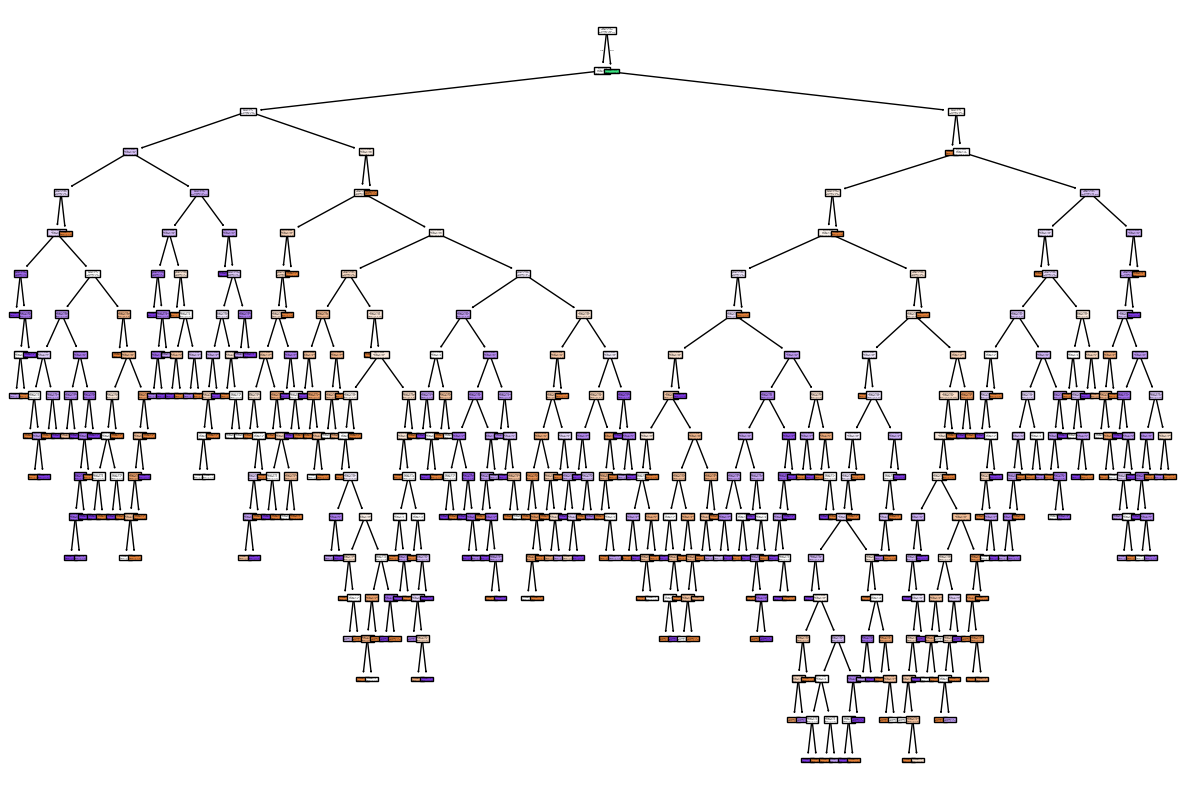

In [56]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_cls,filled=True) ##plot the Decision Tree

## **Post Pruning Decision Tree using Cost Complexity Pruning**

In [57]:
X_train_encoded=final_pipeline.named_steps["Preprocessing"].fit_transform(X_train) ##Extract the preprocessing step from the Pipeline
X_test_encoded=final_pipeline.named_steps["Preprocessing"].transform(X_test)## encoded categorical variables in the test data

In [58]:
X_train_resample,Y_train_resmaple=final_pipeline.named_steps["Resampling SMOTE"].fit_resample(X_train_encoded,Y_train)

In [59]:
path=dt_cls.cost_complexity_pruning_path(X_train_resample,Y_train_resmaple)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [60]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    clf.fit(X_train_resample,Y_train_resmaple)
    clfs.append(clf)

print("Number of nodes in the last tree is:{} with ccp_alpha:{}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is:1 with ccp_alpha:0.9182958340544894


In [61]:
train_scores=[clf.score(X_train_resample,Y_train_resmaple) for clf in clfs]
test_scores=[clf.score(X_test_encoded,Y_test) for clf in clfs]

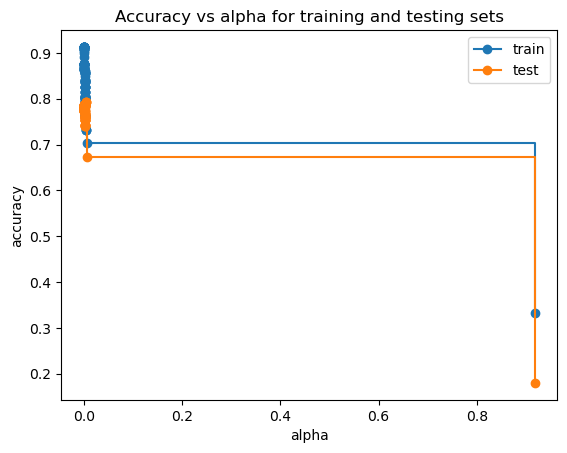

In [62]:
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker="o",label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker="o",label="test",drawstyle="steps-post")

ax.legend()
plt.show()

## **Model Deployment using Mlflow**

In [63]:
import mlflow

In [67]:
import mlflow.sklearn
import mlflow.sklearn


mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Decision --Tree-- Classifier")

##Decision Tree Classifier without hyperparamter tune
with mlflow.start_run(run_name="Decision Tree Classifier"):
    params={
      "criterion":'gini', 
      "splitter":"best", "max_depth": None, 
      "min_samples_split":2, "min_samples_leaf":1, 
      "min_weight_fraction_leaf":0,
    }
    mlflow.log_params(params)

    metrics_1={
        "accuracy":accuracy_score(Y_test,Y_pred),
        "f1-score":f1_score(Y_test,Y_pred,average='weighted'),
        "precision":precision_score(Y_test,Y_pred,average="weighted"),
        "recall":recall_score(Y_test,Y_pred,average="weighted")
    }
    for key,value in metrics_1.items():
        mlflow.log_metric(key,value)
    mlflow.sklearn.log_model(final_pipeline,"Decision Tree Classifier")
#########################################################################
#####Decision Tree Classifier with GridSearch CV

with mlflow.start_run(run_name="Decision Tree Classifier with Grid SearchCV"):
    mlflow.log_params(best_parameters)
    metrics_2={
        "accuracy":accuracy_score(Y_test,Y_pred_cv),
        "f1-score":f1_score(Y_test,Y_pred_cv,average='weighted'),
        "precision":precision_score(Y_test,Y_pred_cv,average="weighted"),
        "recall":recall_score(Y_test,Y_pred_cv,average="weighted")
    }

    for key,value in metrics_2.items():
        mlflow.log_metric(key,value)
    mlflow.sklearn.log_model(best_model,"Decision Tree Classifier with Grid SearchCV")

################################################################################
########Deicsion Tree Classifier with Optuna
with mlflow.start_run(run_name="Decision Tree Classifier with Optuna"):
    mlflow.log_params(best_model_optuna)
    metrics_3={
        "accuracy":accuracy_score(Y_test,Y_pred_optuna),
        "f1-score":f1_score(Y_test,Y_pred_optuna,average='weighted'),
        "precision":precision_score(Y_test,Y_pred_optuna,average="weighted"),
        "recall":recall_score(Y_test,Y_pred_optuna,average="weighted") 
    }

    for key,value in metrics_3.items():
        mlflow.log_metric(key,value)
    mlflow.sklearn.log_model(best_pipeline,"Decision Tree Classifier with Optuna")

2025/07/25 20:11:46 INFO mlflow.tracking.fluent: Experiment with name 'Decision --Tree-- Classifier' does not exist. Creating a new experiment.


2025/07/25 20:11:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 20:11:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree Classifier at: http://127.0.0.1:5000/#/experiments/999700054496034134/runs/dd14004f022a49f39e18582b40f2a2e6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/999700054496034134


2025/07/25 20:11:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 20:12:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree Classifier with Grid SearchCV at: http://127.0.0.1:5000/#/experiments/999700054496034134/runs/43db303dc0fb4b2695b8c3c8fcc56d77
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/999700054496034134


2025/07/25 20:12:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/25 20:12:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree Classifier with Optuna at: http://127.0.0.1:5000/#/experiments/999700054496034134/runs/28d01e6cd65442e8b8ac64a326e9c57b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/999700054496034134
